In [8]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import segypy
from scipy.interpolate import griddata, interp2d

In [6]:
# Set verbose level
segypy.verbose=1;

filename_seismic ='./data/3d_farstack.sgy'
filename_surface = './data/Top_Heimdal_subset.txt'

In [7]:
inl = np.arange(1300,1502,2)
crl = np.arange(1500,2002,2)
hrz = np.recfromtxt(filename_surface, names=['il','xl','z'])

seis, header, trace_headers=segypy.readSegy(filename_seismic)
near = seis.reshape(header['ns'], inl.size,crl.size)

lagtime = trace_headers['LagTimeA'][0]*-1
twt = np.arange(lagtime, header['dt']/1e3*header['ns']+lagtime, header['dt']/1e3)

SegyPY0.57:  readSegy : Trying to read ./data/3d_farstack.sgy
SegyPY0.57:  getSegyHeader : succesfully read ./data/3d_farstack.sgy
SegyPY0.57:  filesize=31438840
SegyPY0.57:  bps=    4
SegyPY0.57:  nd=7858810
SegyPY0.57:  readSegyData : Reading segy data
SegyPY0.57:  readSegyData : SEG-Y revision = 0
SegyPY0.57:  readSegyData : DataSampleFormat=1(IBM Float)
SegyPY0.57:   ns=250
SegyPY0.57:  readSegyData : Finished reading segy data


In [9]:
horizon = np.zeros((len(inl), len(crl)))

In [10]:
for i, idx in enumerate(inl):
    for j, xdx in enumerate(crl):
        time = hrz['z'][np.where((hrz['il']== idx) & (hrz['xl'] == xdx))]
        if len(time) == 1:
            horizon[i, j] = time 

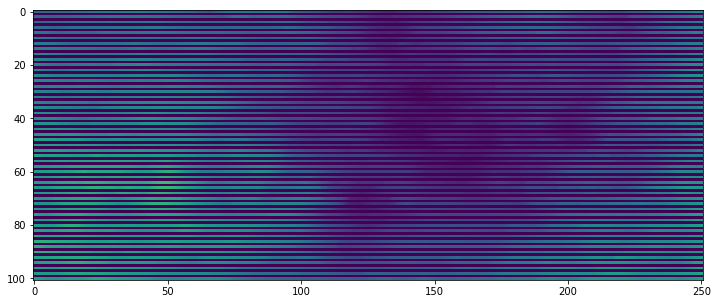

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.imshow(horizon, vmin=2030, vmax=2200)

In [12]:
existing_points = []
missing_points = []
for i in range(horizon.shape[0]):
    for j in range(horizon.shape[1]):
        if horizon[i, j] != 0.:
            existing_points.append([i, j, horizon[i, j]])
        else:
            missing_points.append([i, j])
existing_points = np.array(existing_points)
print(existing_points.shape)

(12801, 3)


In [13]:
zs2 = griddata(existing_points[:, 0:2], existing_points[:, 2], missing_points, method="cubic")

In [14]:
for p, val in zip(missing_points, zs2):
    horizon[p[0], p[1]] = val

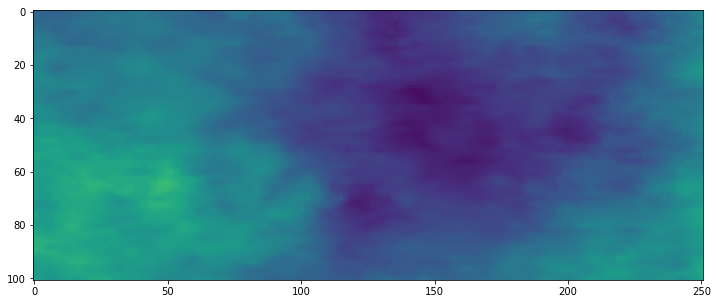

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.imshow(horizon, vmin=2030, vmax=2200)
#np.save("horizon.npy", horizon)

In [16]:
N = 38
M = 0
hrz_idx = [np.abs(twt-val).argmin() for val in horizon[N, :]]

(62, 0)

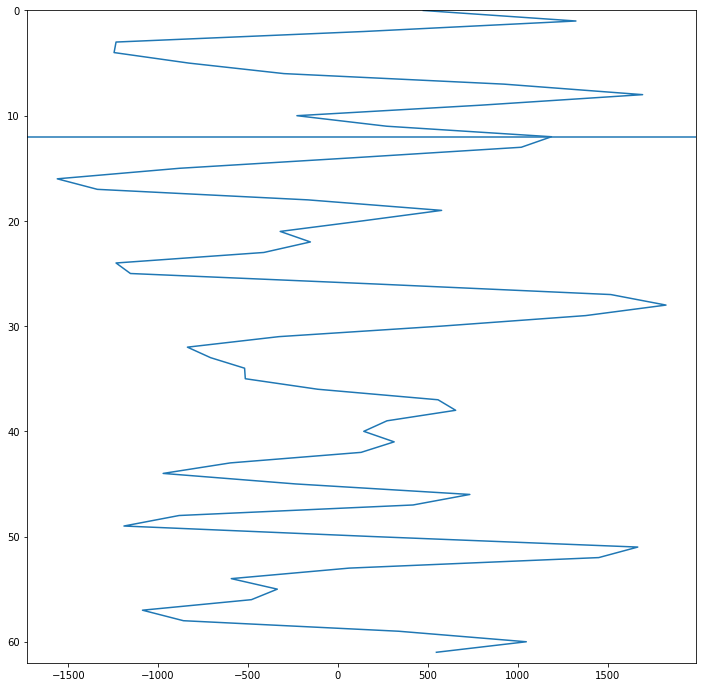

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
top_add, below_add = 12, 50
amplitude = near[hrz_idx[M]-top_add:hrz_idx[M]+below_add, N, M]
ax.plot(amplitude, range(len(amplitude)))
ax.axhline(top_add)
ax.set_ylim(below_add+top_add, 0)

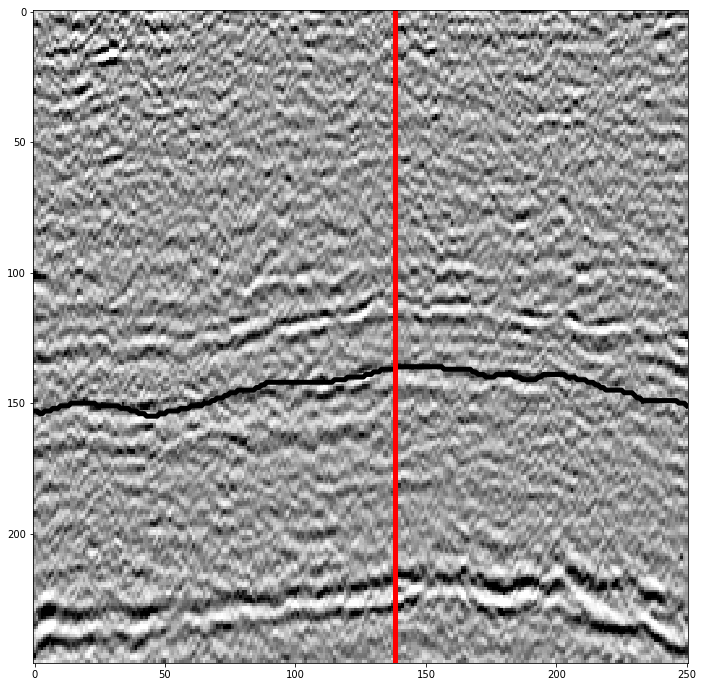

In [18]:
h_bin = np.zeros((250, near[:, N].shape[1]))
for i, val in enumerate(hrz_idx):
    h_bin[val, i] = 1
    
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
clip = abs(np.percentile(seis, 0.8))
ax.imshow(near[:, N], cmap="Greys", vmin=-clip, vmax=clip)
ax.plot(range(len(hrz_idx)), hrz_idx, linewidth=5, color="black")
ax.axvline(276//2, color="red", linewidth=5)

In [19]:
top_add, below_add = 12, 52
traces = np.zeros((horizon.shape[0], horizon.shape[1], top_add+below_add))
for i in range(horizon.shape[0]):
    hrz_idx = [np.abs(twt-val).argmin() for val in horizon[i, :]]
    for j in range(horizon.shape[1]):
        amplitude = near[hrz_idx[j]-top_add:hrz_idx[j]+below_add, i, j]
        traces[i, j, :] = amplitude

In [20]:
print(traces.shape)

(101, 251, 64)


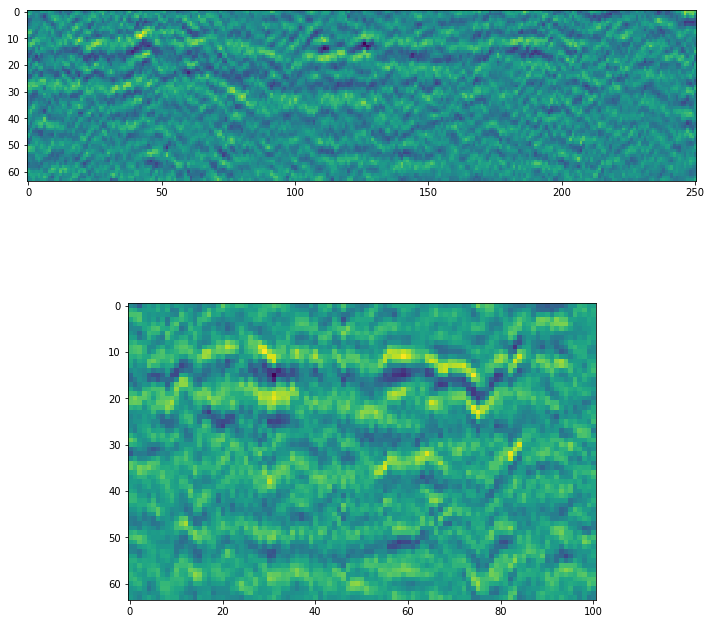

In [23]:
fig, axarr = plt.subplots(2, 1, figsize=(12, 12))
axarr[0].imshow(traces[38].T)
axarr[1].imshow(traces[:, 138].T)

In [25]:
#np.save("far_traces_64.npy", traces)

In [22]:
well_i, well_x = 36, 276//2
print(well_i, well_x)
block = []

near[:, well_i, well_x]

36 138


array([-8.020e+02, -1.830e+02,  1.200e+02,  7.820e+02,  6.280e+02,
       -5.010e+02, -7.310e+02,  1.820e+02,  2.600e+02, -3.510e+02,
        1.880e+02,  8.440e+02,  4.300e+01, -7.280e+02, -6.500e+01,
        6.840e+02,  3.780e+02, -1.600e+01,  1.330e+02,  2.490e+02,
        1.600e+01, -3.030e+02, -6.390e+02, -9.140e+02, -4.090e+02,
        6.700e+02,  9.710e+02,  5.550e+02,  3.770e+02,  2.630e+02,
       -6.020e+02, -1.396e+03, -8.530e+02,  2.040e+02,  7.460e+02,
        5.360e+02, -2.800e+02, -9.690e+02, -5.210e+02,  8.760e+02,
        1.498e+03,  3.870e+02, -8.200e+02, -4.800e+02,  4.900e+02,
        4.050e+02, -5.800e+02, -8.090e+02, -2.250e+02,  1.690e+02,
        4.110e+02,  8.870e+02,  1.095e+03,  3.420e+02, -8.770e+02,
       -1.614e+03, -1.551e+03, -7.350e+02,  4.410e+02,  1.335e+03,
        1.453e+03,  4.410e+02, -6.940e+02, -2.580e+02,  1.132e+03,
        1.306e+03, -1.660e+02, -1.500e+03, -1.230e+03, -1.040e+02,
        3.090e+02, -7.500e+01, -2.200e+02, -2.000e+01, -2.900e